The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

As a data analyst that found the dataset above that contains a lot of customer activity on retail so here in this project want to provide the market segmentation and purchase behaviour analysis to help the businessman in set up the strategy of the development of the best seller product and in set up the right target of the marketing based on the retail company from UK here



# Objective


1. What items sold the most? 
2. Which countries make the most purchases? 
3. Is low price the most popular choice for customers when choosing a product?
4. Show trend sales in a year
5. Know what top 10 item sold?

# Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer

# Load the dataset

In [2]:
#Untuk mengeload data set
df_ori=pd.read_csv('data_set.csv')


#Membuat Duplicate df_ori
df=df_ori.copy()

#Tampilkan 5 data ter atas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [6]:
df.duplicated().sum()

5268

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

From information above we can said that there are a lot of duplicated data so we can omit it but there are a lot of missing value to that we cant omit all of the, because it can affect the analysis so we can overcome it with filling that missing value with zero value like that i want to do below. But before that I want to know where the missing values ​​are located in our data dan i want to change tha name of the columns with lowercase and change the space into underscore

# Data Exploratory

In [8]:
# Changing Column Name
df.rename(columns={'InvoiceNo':'no_inovice','StockCode':'stock_code','Description':'item_bought','Quantity':'quantity','InvoiceDate':'invoice_date','UnitPrice':'unit_price','CustomerID':'customer_id','Country':'country'}, inplace=True)
df.head()

,no_inovice,stock_code,item_bought,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
# To show what is the most item bought by the costumer
df.item_bought.mode().values[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [10]:
# To show 5 most item bought by the customer
df.item_bought.value_counts().head(5)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: item_bought, dtype: int64

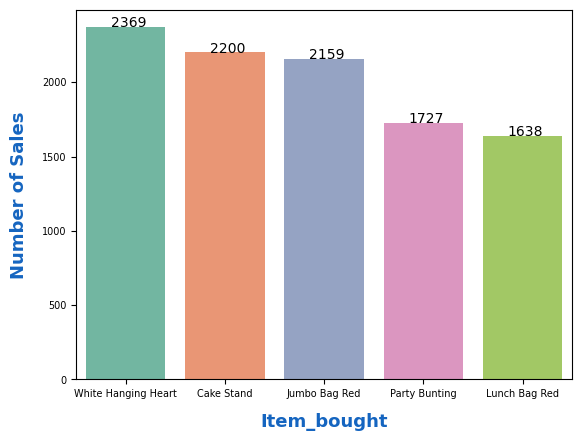

In [11]:
# List all the item bought
item_bought = {'item_bought': ['White Hanging Heart', 'Cake Stand', 'Jumbo Bag Red', 'Party Bunting', 'Lunch Bag Red'],
'Jumlah': [2369, 2200, 2159, 1727, 1638]}

# Setting up the bar plot
ax = sns.barplot(data=item_bought, x='item_bought', y='Jumlah', palette='Set2')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x() + 0.25, i.get_height() + 1))
    ax.tick_params(axis = 'both', labelsize = 7)
plt.xlabel('Kategori', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.ylabel('Jumlah', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)


# giving a title
plt.xlabel('Item_bought')
plt.ylabel('Number of Sales')

# Show the plot
plt.show()

In [12]:
# To show country that bought item > 1000 from UK retail
country= df['country'].value_counts()[df['country'].value_counts() > 1000]
print(country)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Norway              1086
Name: country, dtype: int64


It is indicate that the country that bought an item from UK retail in December almost come from Europe Country and here is the plot of the country below

C:\Users\user\AppData\Local\Temp\ipykernel_11220\2369330723.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(countries_above_1000))  # Menggunakan colormap 'tab20'


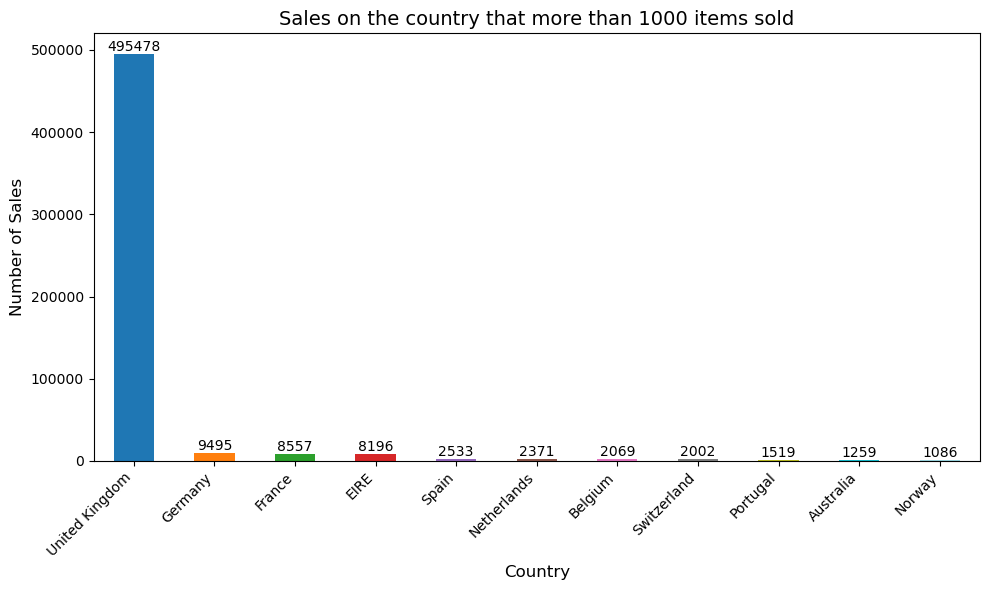

In [13]:
# Menghitung jumlah data pada kolom 'country' dan menampilkan negara dengan jumlah kemunculan > 1000
countries_above_1000 = df['country'].value_counts()[df['country'].value_counts() > 1000]

# Menggunakan colormap untuk memberikan warna yang berbeda pada setiap batang
colors = plt.cm.get_cmap('tab20', len(countries_above_1000))  # Menggunakan colormap 'tab20'

# Plotting bar plot dengan warna berbeda
plt.figure(figsize=(10, 6))
ax = countries_above_1000.plot(kind='bar', color=colors(range(len(countries_above_1000))))

# Menambahkan title dan label
plt.title('Sales on the country that more than 1000 items sold', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)

# Memperbaiki tampilan label sumbu x agar tidak tumpang tindih
plt.xticks(rotation=45, ha='right')

# Menambahkan angka di atas setiap bar
for i, v in enumerate(countries_above_1000):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)  # Menambahkan angka sedikit di atas batang

# Menampilkan plot
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


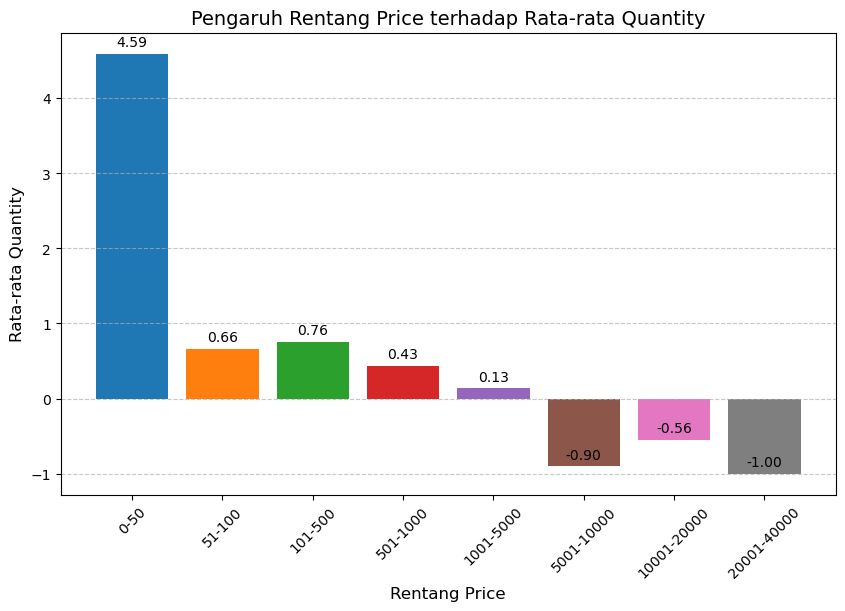

In [14]:
# Menghapus data dengan price <= 0
df_cleaned = df[df['unit_price'] > 0]

# Menghitung IQR untuk mendeteksi outlier pada quantity
Q1 = df_cleaned['quantity'].quantile(0.25)
Q3 = df_cleaned['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier pada quantity
df_cleaned = df_cleaned[(df_cleaned['quantity'] >= Q1 - 1.5 * IQR) & (df_cleaned['quantity'] <= Q3 + 1.5 * IQR)]

# Mengelompokkan harga ke dalam rentang
bins = [0, 50, 100, 500, 1000, 5000, 10000, 20000, 40000]
labels = ['0-50', '51-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001-20000', '20001-40000']
df_cleaned['price_range'] = pd.cut(df_cleaned['unit_price'], bins=bins, labels=labels)

# Menghitung rata-rata quantity untuk setiap rentang price
price_quantity_grouped = df_cleaned.groupby('price_range')['quantity'].mean().reset_index()

# Visualisasi hasil
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(price_quantity_grouped['price_range'], price_quantity_grouped['quantity'], color=plt.cm.tab10.colors)
plt.title('Pengaruh Rentang Price terhadap Rata-rata Quantity', fontsize=14)
plt.xlabel('Rentang Price', fontsize=12)
plt.ylabel('Rata-rata Quantity', fontsize=12)
for i, val in enumerate(price_quantity_grouped['quantity']):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


the reason is there are negative numbers because the data is not fully cleaned from outlier

In [15]:
#Untuk membuktikan korelasi antara Previous_Purchases' dan 'Review_Rating'
corr_r, pval_p = stats.pearsonr(df['unit_price'], df['quantity'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: -0.00, p-value: 0.3633071641286583


Because r correlation is 0 and p value is more than 0,05 so that are not connection between two columns and not siginificant in statistic so both of the columns standing their own.

## Data Cleaning & Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   no_inovice    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   item_bought   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The data is not balance so there are a missing value in one of those columns like in the item_bought and costumer_id columns. The first step is we can look the type of data missing by looking the pattern of the missing value after that we can handling the missing value and outlier to make our data better and clean.

we have to omit the data duplication with code like below

In [17]:
#Untuk menghapus data terduplikasi
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   no_inovice    536641 non-null  object 
 1   stock_code    536641 non-null  object 
 2   item_bought   535187 non-null  object 
 3   quantity      536641 non-null  int64  
 4   invoice_date  536641 non-null  object 
 5   unit_price    536641 non-null  float64
 6   customer_id   401604 non-null  float64
 7   country       536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


Okay you can see that we have deleted the data duplication from 541909 to 401604 data

## Checking & Handling Missing Value

In [20]:
#Untuk melihat alasan data NaN pada kolom minimum payment
df[df.item_bought .isnull()].head(20)

,no_inovice,stock_code,item_bought,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/2010 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/2010 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom


dapat disimpulkan dari data di atas mekanisme data hilangnya merupaka `MAR(Missing At Random)` yaitu data yang hilang merupakan data acak dan tidak terpengaruh karena faktor tertentu yang dibuktikan dengan setiap baris yang memiliki nilai Nan tidak ada kaitanya dengan kolom lain yang dapat mempengaruhi kolom `minimum_payment` memiliki nilai Nan. Pada kasus MAR tidak menjadi masalah atau langkah yang aman untuk kita mengedrop atau menghilangkan missing value tanpa harus imputing nilai nya menjadi `0` atau imputing menggunakan `median`. langkah selanjutnya adalah mari kita hapus missing value nya

In [21]:
df.isnull().sum()

no_inovice           0
stock_code           0
item_bought       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
country              0
dtype: int64

In [22]:
# #Mari kita hapus missing value atau null 
df.dropna(subset=['item_bought'], inplace= True)
df.dropna(subset=['customer_id'], inplace= True)

In [23]:
df.isnull().sum()

no_inovice      0
stock_code      0
item_bought     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Checking and Handling Outlier

In [24]:
# Function untuk membuat histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 10))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=10)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

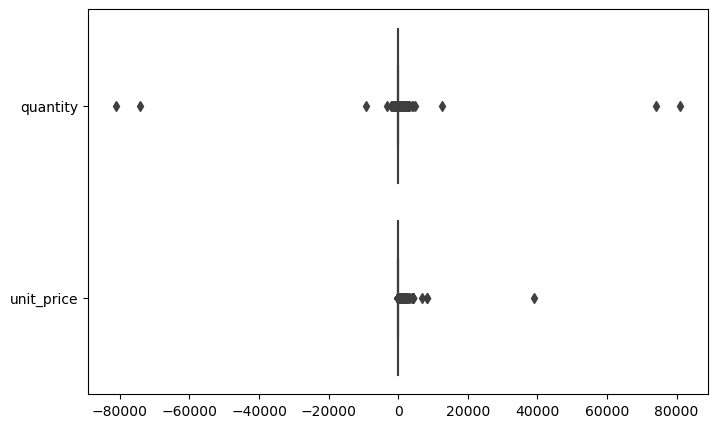

In [25]:
# Pilih hanya kolom numerik yang relevan (tanpa CustomerID)
numerical_columns = ['quantity', 'unit_price']  # Sesuaikan dengan nama kolom Anda

# Membuat boxplot tanpa CustomerID
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[numerical_columns], orient="h")
plt.show()

It looks like there are a lot of outliers in Quantity column, the step that we have to do is investigating why there a negative value on the quantity and unit price columns and what causes bumping in that unit price. Now we will take a look the skewness by looking the number

In [26]:
# Memastikan data skewness melalui angka
print('Distribution of column `Quantity`  : ', df['quantity'].skew())
print('Distribution of column `UnitPrice`  : ', df['unit_price'].skew())

Distribution of column `Quantity`  :  0.17995683282727953
Distribution of column `UnitPrice`  :  449.3162446474703


Untuk Data yang memiliki distribusi normal memiliki skewwness diantara `-0.5` dan `0.5` sehingga data yang melampaui batasan tersebut bisa di katakan data skew atau memiliki outlier sehingga untuk kolom yang memiliki outlier kita harus menggunakan metode capping `IQR` untuk handling outlier. Alasan dilakukan capping outlier pada data karena feature yang kita miliki sangat sedikit sehingga kita tidak mau menghapus feature apapun dengan handling outlier menggunakan capping memiliki keuntungan yaitu tidak perlu untuk menghapus feature apapun dalam data kita

In [27]:
# Capping distribusi data skew

winsoriser_skew = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=['quantity', 'unit_price'])

df_capped = winsoriser_skew.fit_transform(df)

In [28]:
import plotly.graph_objects as go

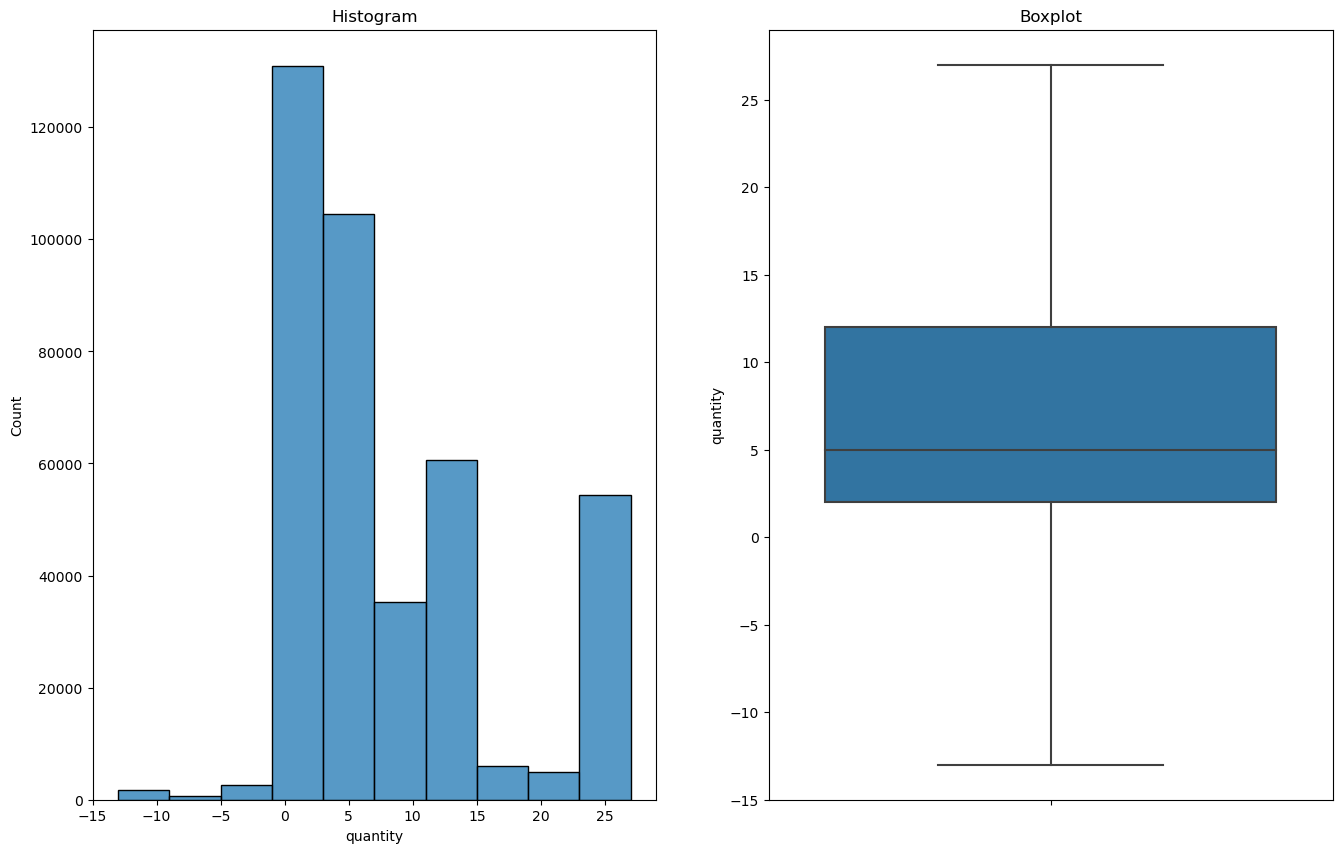

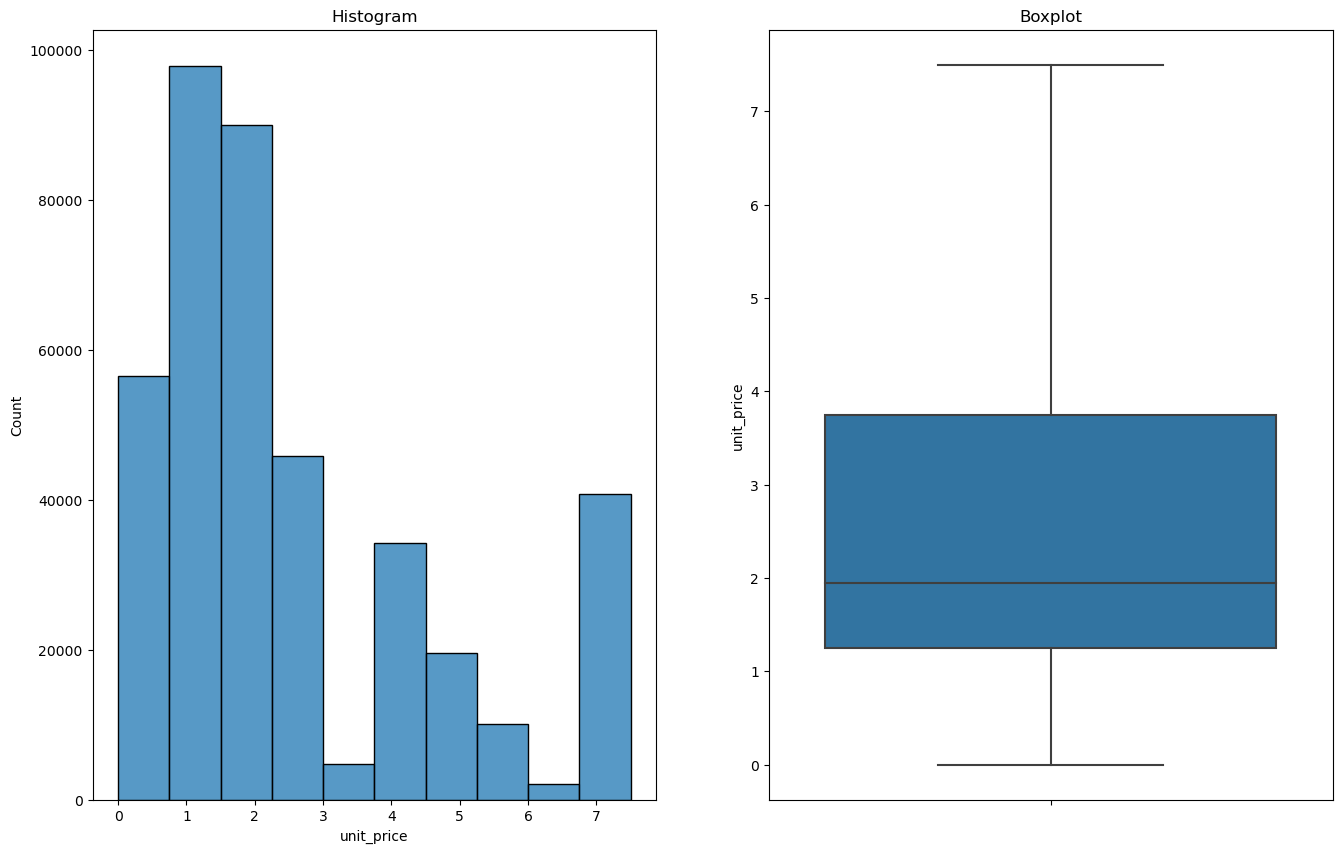

In [29]:
#Looping untuk visualisasi data sebelum dan sesudah dilakukannya capping
columns = ['quantity','unit_price']

for i in columns:
    diagnostic_plots(df_capped, i)

In [30]:
df.shape

(401604, 8)

let me check again for the last time :)

In [31]:
#Untuk melihat alasan data NaN pada kolom minimum payment
df[df.item_bought.isnull()].head(20)

,no_inovice,stock_code,item_bought,quantity,invoice_date,unit_price,customer_id,country


Okay that is succesfull because empty isnull

# Data Analysis

Now we will investigate top product sold from the data

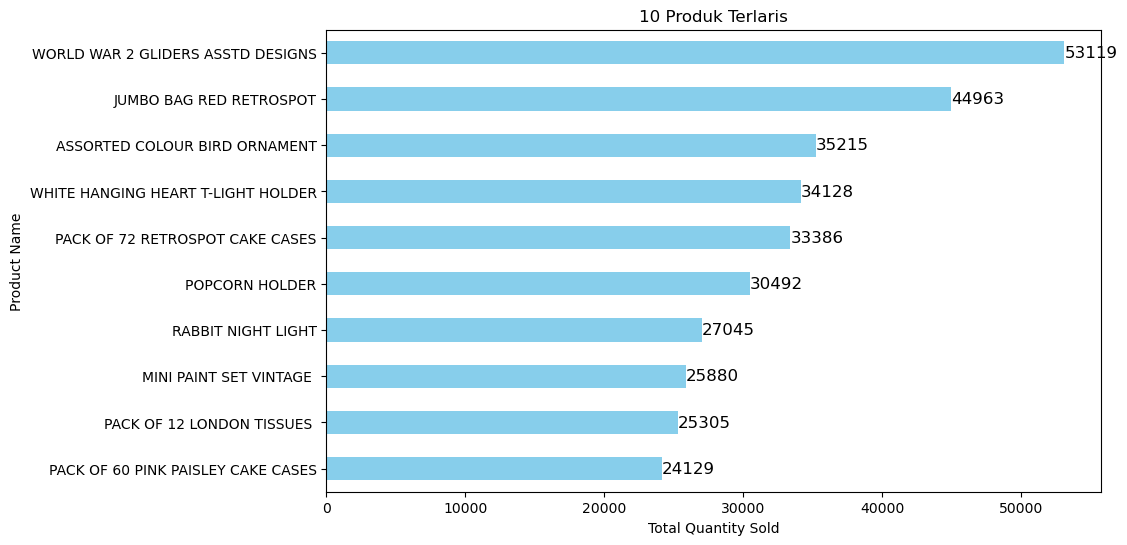

In [32]:
import matplotlib.pyplot as plt

# Menghitung top 10 produk terlaris
top_products = df.groupby('item_bought')['quantity'].sum().nlargest(10)

# Membuat bar chart horizontal
plt.figure(figsize=(10, 6))
ax = top_products.plot(kind='barh', color='skyblue', title='10 Produk Terlaris')

# Menambahkan angka di setiap bar
for index, value in enumerate(top_products):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black')

# Membalik urutan sumbu Y agar ranking dari atas ke bawah (opsional)
plt.gca().invert_yaxis()

# Menampilkan plot
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

It looks from the data the most customer buy things for their family as a gift, or want to decorate by some variation decoration, and last buy things for food preparation like tools or place for cake.

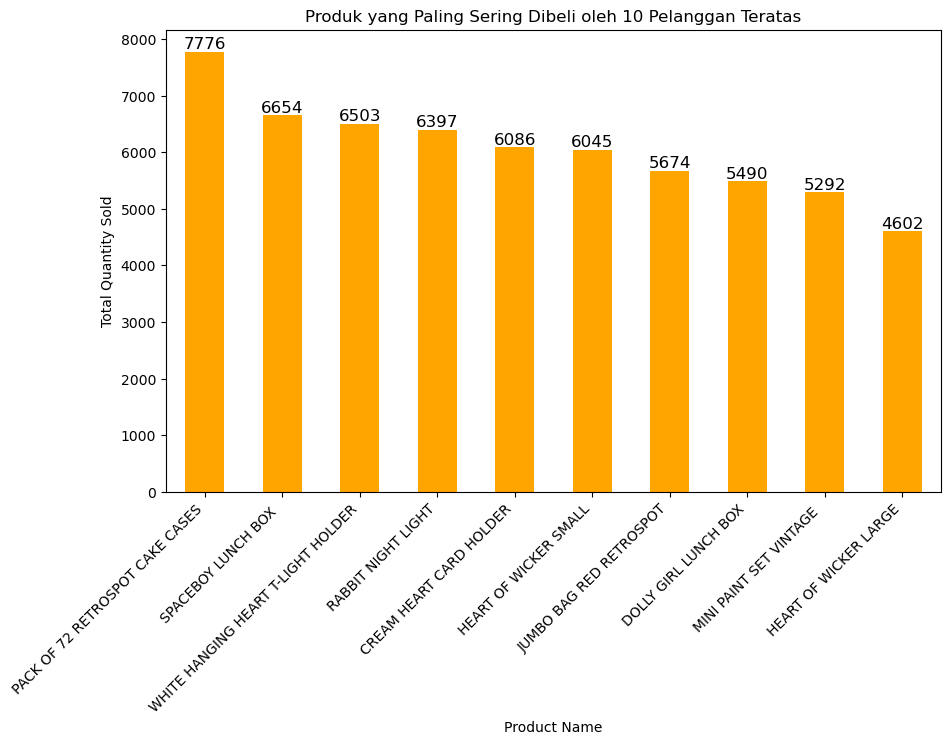

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung total belanja per pelanggan
top_customers = df.groupby('customer_id')['quantity'].sum().nlargest(10)

# Filter data hanya untuk 10 pelanggan teratas
top_customer_transactions = df[df['customer_id'].isin(top_customers.index)]

# Menghitung produk yang paling sering dibeli oleh pelanggan tersebut
top_products_by_top_customers = (
    top_customer_transactions.groupby('item_bought')['quantity'].sum().nlargest(10)
)

# Visualisasi hasil dalam bentuk bar chart
plt.figure(figsize=(10, 6))
top_products_by_top_customers.plot(kind='bar', color='orange', title="Produk yang Paling Sering Dibeli oleh 10 Pelanggan Teratas")

# Tambahkan angka di atas batang
for index, value in enumerate(top_products_by_top_customers):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.show()


Same like the most items bought by the costumers, top ten customers also bought items like tool for food preparation for example place for cake or lunch box and some decoration for house and toy for gift to the children.

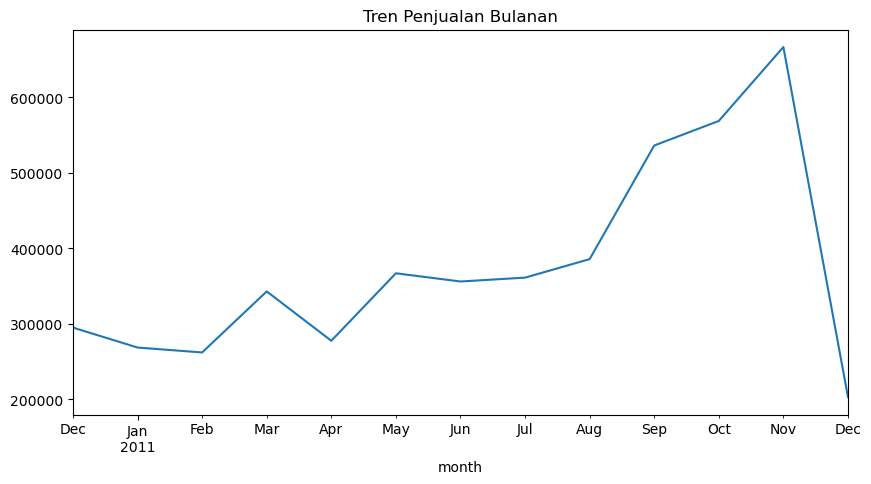

In [34]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])  # Konversi ke datetime
df['month'] = df['invoice_date'].dt.to_period('M')  # Buat kolom bulan

# Agregasi total penjualan per bulan
monthly_sales = df.groupby('month')['quantity'].sum()

# Visualisasi tren
import matplotlib.pyplot as plt
monthly_sales.plot(kind='line', figsize=(10,5), title="Tren Penjualan Bulanan")
plt.show()

From trend sales in Dec 2010 - Dec 2011, the conclusion is the most of the costumers highest purchase in November because in novemver at America or around celebrate many events for example like thanks giving that big relation to all of the family member meet together so it is the right time to make house more beautiful with decoration, cook some meals as snack like cake, bought a toy for children as gift or to play together. After that there are also events like black friday and cyber monday that provide big discounts so all people do transaction or purchases in that time to prepare the big event too like cristmas in december thats why the sales in decembere  declined.

Korelasi antara Price dan Quantity: -0.001243467478203008


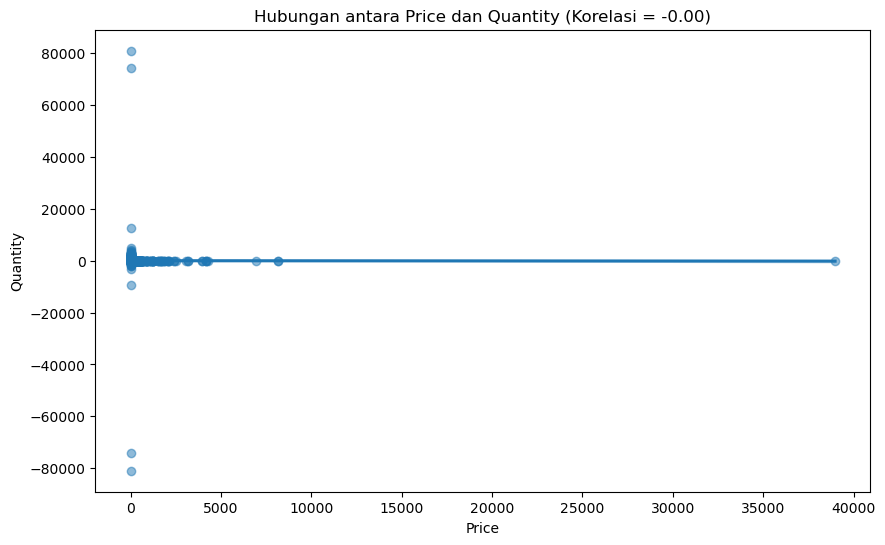

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya, data sudah berada dalam DataFrame 'df'
# Jika belum, Anda bisa load data menggunakan pd.read_csv('nama_file.csv')

# Menghitung korelasi antara kolom 'price' dan 'quantity'
correlation = df['unit_price'].corr(df['quantity'])
print("Korelasi antara Price dan Quantity:", correlation)

# Membuat scatter plot dengan garis regresi
plt.figure(figsize=(10,6))
sns.regplot(x='unit_price', y='quantity', data=df, scatter_kws={'alpha': 0.5})
plt.title(f'Hubungan antara Price dan Quantity (Korelasi = {correlation:.2f})')
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

because the correlation -0,0 so the correlation is weak.

In [36]:
df.to_excel('data_bersih.xlsx', index=False)